# Clustering - Kmeans


##1. Simple walk through example

In [1]:
# You will use the matplotlib.pyplot library, sklearn.cluster etc. etc.
%matplotlib inline
import pandas
import matplotlib.pyplot
import sklearn.cluster
import numpy
import sklearn.metrics
from sklearn.datasets import load_iris

In [2]:
# scikit learn includes a number of sample data sets. The data about
# iris flowers clusters very well
iris_data = sklearn.datasets.load_iris().data

In [3]:
# Choose three nice contrasting colours and create a pandas array listing them
iris_colors = numpy.array(['purple','green','orange'])
type(iris_colors)

numpy.ndarray

In [4]:
# Create a sklearn.cluster.KMeans object to work with 3 clusters
kmeans_clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=3)

In [6]:
# Cluster this iris_data
iris_cluster_kmeans = kmeans_clusterer.fit_predict(iris_data)
iris_data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

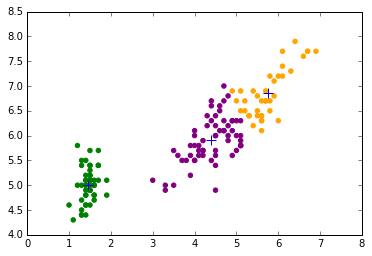

In [62]:
# Draw a scatter plot using columns [:,2] and [:,0] (the petal length and the sepal length)
# Use your colour array (indexed by the cluster) for the colouring
# When you have that working, draw the cluster_centers_ on the scatter plot as well

matplotlib.pyplot.scatter(iris_data[:,2],
                          iris_data[:,0],
                          color=iris_colors[iris_cluster_kmeans]
                         )
matplotlib.pyplot.scatter(kmeans_clusterer.cluster_centers_[:,2],
                          kmeans_clusterer.cluster_centers_[:,0],
                          marker='+',
                          s=120
                         )

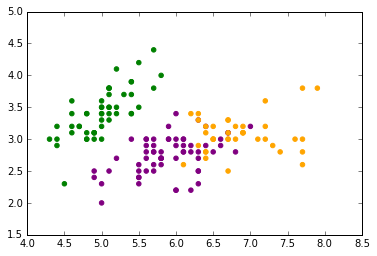

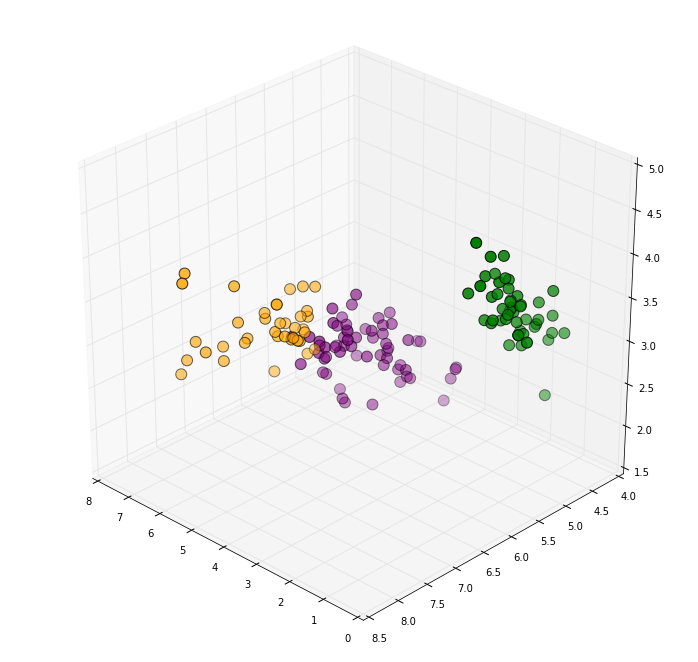

In [63]:
# (Optional) What does a scatter plot of some of the other columns look like?
matplotlib.pyplot.scatter(iris_data[:,0],
                          iris_data[:,1],
                          color=iris_colors[iris_cluster_kmeans]
                         )
# (Optional) What does a 3D plot look like?
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.pyplot.suptitle('3d plot', fontsize=15)
ax = Axes3D(matplotlib.pyplot.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(iris_data[:,2], iris_data[:,0], iris_data[:,1], c = iris_colors[iris_cluster_kmeans], s=120)

## Same again, using DBSCAN

In [64]:
# Create a DBSCAN clusterer. Try eps=0.4 with min_samples=3
# eps means the radius

dbscan_clusterer = sklearn.cluster.DBSCAN(eps=0.4,min_samples=3)

In [65]:
# Try to cluster that iris_data
iris_cluster_dbscan = dbscan_clusterer.fit_predict(iris_data)

In [66]:
# How many clusters does it find? (Remember that -1 means "outlier", 
# and that the clusters are number starting with cluster 0)
iris_cluster_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  3,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1, -1,  3,
        3,  3,  3, -1, -1, -1, -1, -1,  3,  3,  3,  3, -1,  3,  3, -1, -1,
       -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3, -1, -1,  3,  3, -1, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3])

In [67]:
# Colouring is a little more difficult: make a dictionary. Set
# the keys to being all possible cluster numbers (including -1);
# set the corresponding values to different colours
iris_colors_dbscan = { -1 : 'red',
                       0 : 'green',
                       1 : 'blue',
                       2 : 'orange',
                       3 : 'purple'
                     }
iris_colors_dbscan

{-1: 'red', 0: 'green', 1: 'blue', 2: 'orange', 3: 'purple'}

In [68]:
# Create a list of colour annotations by mapping the fit_predict()
# output through your dictionary. e.g. you could create a list
# comprehension, or you could use the map() function, or iterate
# through the fit_predict() output
[iris_colors_dbscan[x] for x in iris_cluster_dbscan]
type([iris_colors_dbscan[x] for x in iris_cluster_dbscan])

iris_colors_dbscan_array = numpy.array([iris_colors_dbscan[x] for x in iris_cluster_dbscan])

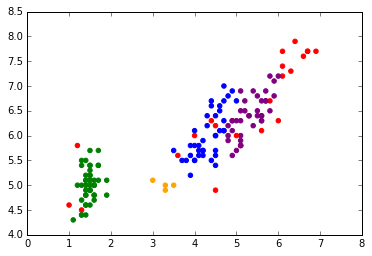

In [69]:
# Create a scatter plot. How does it compare to the KMeans clustering?

matplotlib.pyplot.scatter(iris_data[:,2],
                          iris_data[:,0],
                          color=iris_colors_dbscan_array
                         )

## Finding an appropriate number of clusters with KMeans

And we'll also use the Silhouette coefficient

In [70]:
# Create 15 different KMeans clusterers, each
# with values 1..15 n_clusters.
# Create a bunch of different models

In [71]:
# Use these 15 clusterers on the iris_data
cluster_centers = {}
cluster_membership = {}
for cluster_count in range(1,16):
    km = sklearn.cluster.KMeans(init='k-means++',
                                n_clusters=cluster_count
                               )
    cluster_membership[cluster_count] = km.fit_predict(iris_data)
    cluster_centers[cluster_count] =  km.cluster_centers_
range(2,16)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [72]:
# Calculate the silhouette scores for these clusterings (there might be problems with
# calculating a silhouette score for the n_clusters=1 clusterer)
s = {}
for cluster_count in range(2,16):
    s[cluster_count] = sklearn.metrics.silhouette_score(iris_data,
                                         cluster_membership[cluster_count]
                                        )
    print cluster_count, s[cluster_count]

2 0.680813620271
3 0.552591944521
4 0.497825690075
5 0.488517550854
6 0.366504014753
7 0.359842105039
8 0.357270349229
9 0.343158236667
10 0.315832474607
11 0.319415446673
12 0.304846941079
13 0.293438792138
14 0.281916179069
15 0.298059555337


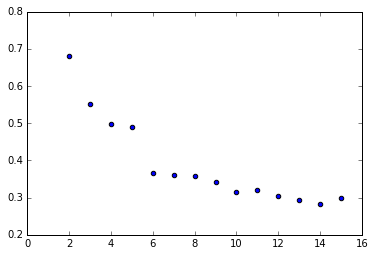

In [73]:
# Plot the silhouette score against the number of clusters.
# Are there "elbows" in this graph? (i.e. points where adding extra
# clusters doesn't make that much extra difference to the silhouette score)
matplotlib.pyplot.scatter(s.keys(), s.values())